In [1]:
# importando a biblioteca pandas
import pandas as pd

In [3]:
# Carregando arquivos
path = "/content/drive/MyDrive/Colab Notebooks/DIO_AnaliseDadosPythonPandas/datasets"
df1 = pd.read_excel(path+"/"+"Aracaju.xlsx")
df2 = pd.read_excel(path+"/"+"Fortaleza.xlsx")
df3 = pd.read_excel(path+"/"+"Natal.xlsx")
df4 = pd.read_excel(path+"/"+"Recife.xlsx")
df5 = pd.read_excel(path+"/"+"Salvador.xlsx")

In [4]:
# Unindo todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

Caso sua coluna de data não esteja no formato datetime, é necessário transformar seu tipo para que seja mais facilmente manipulável com o pandas.

In [5]:
# Transformando uma coluna em um tipo de data
df["Data"] = pd.to_datetime(df["Data"])

In [7]:
df["Receita"] = df["Vendas"] * df["Qtde"]

In [8]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [11]:
# Utilizando a data, obtendo somente o ano e realizando um agrupamento
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [12]:
# Criando uma nova coluna com o Ano
df["Ano_Venda"] = df["Data"].dt.year


In [13]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
48,Natal,2018-09-20,676.00,852,4,2704.00,4.0,2018
16,Aracaju,2018-01-01,37.68,1522,10,376.80,10.0,2018
16,Salvador,2019-01-01,32.47,1036,2,64.94,2.0,2019
141,Recife,2019-03-02,182.75,983,8,1462.00,8.0,2019
138,Natal,2019-01-02,212.03,1037,3,636.09,3.0,2019
133,Recife,2019-03-02,14.67,980,7,102.69,7.0,2019
153,Salvador,2019-01-02,17.41,1035,2,34.82,2.0,2019
113,Recife,2019-03-02,38.63,980,2,77.26,2.0,2019
128,Fortaleza,2019-03-02,38.70,982,4,154.80,4.0,2019
174,Salvador,2019-01-02,35.30,1037,1,35.30,1.0,2019


In [14]:
# Criando uma nova coluna com o Mês
df["Mes_Venda"] = df["Data"].dt.month
df["Dia_Venda"] = df["Data"].dt.day

In [15]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda
62,Aracaju,2018-01-01,28.66,1520,3,85.98,3.0,2018,1,1
61,Salvador,2019-01-01,4.54,1036,3,13.62,3.0,2019,1,1
167,Natal,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2
147,Natal,2019-01-02,34.50,1035,1,34.50,1.0,2019,1,2
221,Natal,2019-01-02,142.23,1035,2,284.46,2.0,2019,1,2
163,Salvador,2019-01-02,17.66,1036,3,52.98,3.0,2019,1,2
20,Salvador,2019-01-01,33.97,1034,3,101.91,3.0,2019,1,1
66,Aracaju,2018-01-01,76.59,1523,4,306.36,4.0,2018,1,1
53,Aracaju,2018-01-01,8.64,1522,2,17.28,2.0,2018,1,1
77,Salvador,2019-01-01,218.76,1037,1,218.76,1.0,2019,1,1


In [16]:
# Menor data
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [17]:
# Realizando calculos com datas
# Aqui terá a diferença de dias entre a menor data e a data da venda.
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [18]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias
122,Natal,2019-01-02,13.27,1037,1,13.27,1.0,2019,1,2,366 days
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1,365 days
195,Salvador,2019-01-02,44.89,1036,3,134.67,3.0,2019,1,2,366 days
145,Salvador,2019-01-02,84.62,1034,2,169.24,2.0,2019,1,2,366 days
35,Salvador,2019-01-01,241.45,1037,1,241.45,1.0,2019,1,1,365 days
137,Recife,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days
131,Salvador,2019-03-02,63.48,1037,3,190.44,3.0,2019,3,2,425 days
138,Recife,2019-03-02,150.38,983,6,902.28,6.0,2019,3,2,425 days
96,Salvador,2019-01-01,42.94,1034,3,128.82,3.0,2019,1,1,365 days
20,Salvador,2019-01-01,33.97,1034,3,101.91,3.0,2019,1,1,365 days


In [ ]:
# Criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt

In [19]:
# Coluna com o trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [20]:
df.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
91,Fortaleza,2019-01-01,37.49,1002,1,37.49,1.0,2019,1,1,365 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2.0,2019,3,30,453 days,1
186,Salvador,2019-01-02,169.09,1036,2,338.18,2.0,2019,1,2,366 days,1
63,Natal,2018-02-12,552.00,852,2,1104.00,2.0,2018,2,12,42 days,1
203,Natal,2019-01-02,37.75,1035,2,75.50,2.0,2019,1,2,366 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
77,Natal,2019-04-01,426.00,853,3,1278.00,3.0,2019,4,1,455 days,2
88,Fortaleza,2019-01-01,68.60,1004,6,411.60,6.0,2019,1,1,365 days,1
109,Recife,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
127,Recife,2019-03-02,39.56,982,8,316.48,8.0,2019,3,2,425 days,1


In [21]:
# Filtrando as vendas de Março de 2019 
filtro1 = df["Data"].dt.year == 2019
filtro2 = df["Data"].dt.month == 3
vendas_03_2019 = df.loc[(filtro1 & filtro2)]

In [22]:
vendas_03_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


# Visualizando dados com a Biblioteca MathLib
  A biblioteca Mathlib é totalmente integrada com o Pandas e assim não são necessários muitos ajustes para exibir um gráfico

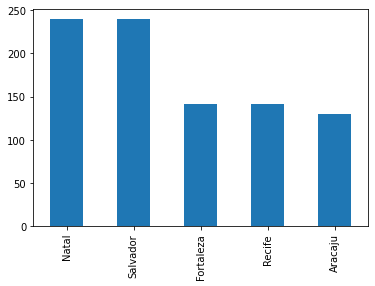

In [25]:
# Grafico de barras
df["Cidade"].value_counts(ascending=False).plot.bar();

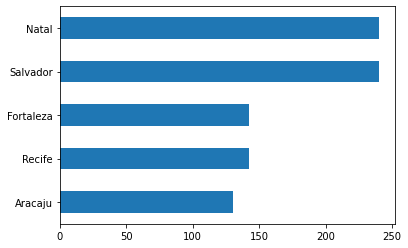

In [27]:
# Gráfico de barras horizontais
df["Cidade"].value_counts(ascending=True).plot.barh();

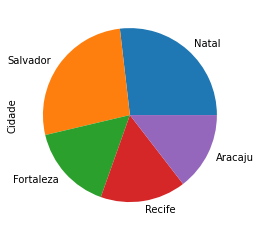

In [29]:
# Grafico de Pizza
df["Cidade"].value_counts(ascending=False).plot.pie();

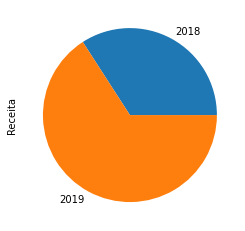

In [35]:
# Grafico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

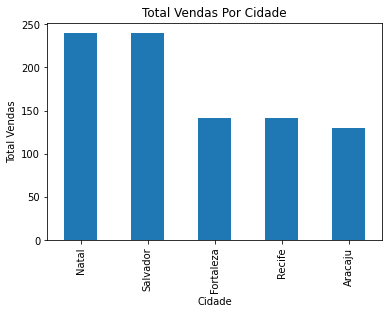

In [36]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas Por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [ ]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total Vendas Por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

Text(0, 0.5, 'Cidade')

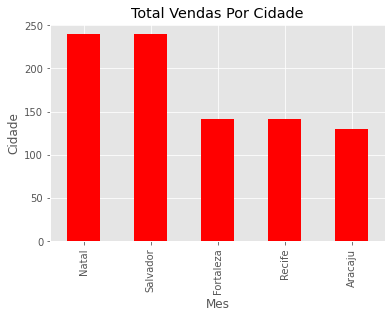

In [42]:
# Alterando as cores
df["Cidade"].value_counts().plot.bar(title="Total Vendas Por Cidade", color="red")
plt.xlabel("Mes")
plt.ylabel("Cidade")

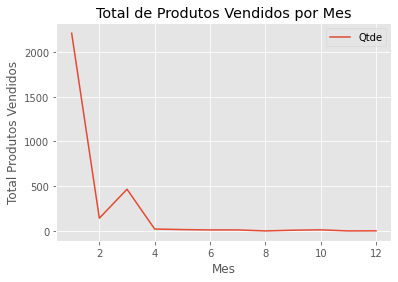

In [49]:
# Alterando estilos matplotlib.org/3.2.1/
plt.style.use("ggplot")
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos por Mes")
plt.xlabel("Mes")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [50]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [51]:
filtro1 = df["Ano_Venda"] == 2019
df_2019 = df[filtro1]

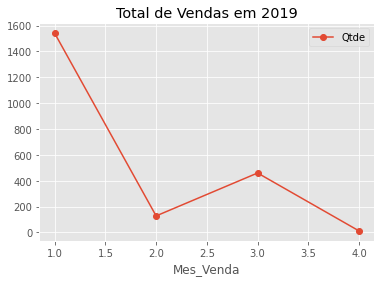

In [82]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(title="Total de Vendas em 2019" ,marker = 'o') # *, o. v 
plt.xlabel = "Mes"
plt.ylabel = "Total de Produtos Vendidos"
plt.legend();

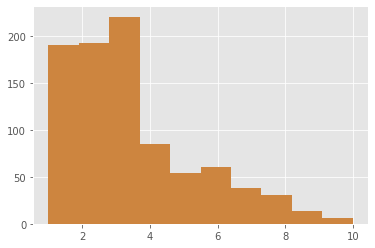

In [63]:
# Grafico em Histograma
plt.hist(df["Qtde"], color="peru");

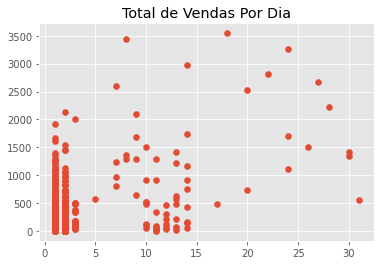

In [77]:
# Gráfico de dispersão
plt.scatter(x=df_2019["Dia_Venda"], y = df_2019["Receita"])
plt.title("Total de Vendas Por Dia");

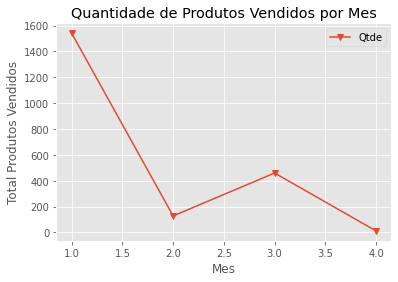

In [87]:
# Salvando o gráfico gerado em um arquivo
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "v",xlabel="Mes", ylabel="Total Produtos Vendidos")
plt.title("Quantidade de Produtos Vendidos por Mes")
#plt.ylabel("Total Produtos Vendidos")
#plt.xlabel("Mes da Venda")
plt.legend();
plt.savefig("Grfico_Qtde_Por_Mes.png")